In [1]:
# этот ноутбук относится к лабе 3.3.4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyperclip import copy as cp

In [2]:
def latex(d: pd.DataFrame, name='table') -> None:
  with open(name+'.tex', 'w') as file:
    file.write(d.to_latex(index=False))

In [3]:
# в максимуме:
2.16 #A
115.2 #V

115.2

# II

In [20]:
data2 = pd.DataFrame()
data2['i'] = [0.30,     0.45,     0.71,      0.93,     1.23,     1.51,     1.82,     1.92] #A
data2['f'] = [0.6-2.05, 0.8-2.85, 0.45-3.73, 0.5-4.7,  0.65-6.3, 0.4-6.41, 0.25-6.8, 0.4-7.1] #mwb, поток
data2['f'] = data2['f'] * -1
data2['b'] = data2['f'] / 7.5
len(data2)

8

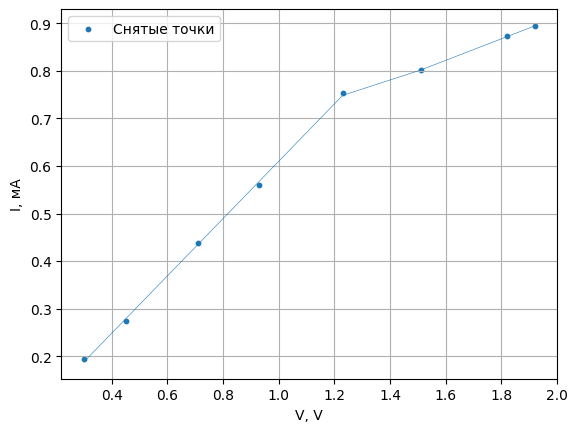

In [66]:
# график
ox = data2['i']
oy = data2['b']

plt.scatter(
  ox,
  oy,
  s=10,
  label="Снятые точки"
)

z1 = np.polyfit(ox[:5], oy[:5], 1)
z2 = np.polyfit(ox[5:], oy[5:], 1)
p1 = np.poly1d(z1)
p2 = np.poly1d(z2)
# plt.plot(ox, p1(ox), linewidth=0.4)
# plt.plot(ox, p2(ox), linewidth=0.4)
plt.plot(ox, [true(i) for i in ox], linewidth=0.4)
plt.xlabel("B, Тл")
plt.ylabel("I, мА")
plt.grid()
plt.legend(loc='best')
# plt.savefig("p1.png")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()
def true(x):
  return p1(x) if x < 1.251 else p2(x)

# III

In [6]:
#токи
[0.3, 0.4, 0.55, 0.70, 0.85, 1.00] #mA

[0.3, 0.4, 0.55, 0.7, 0.85, 1.0]

In [7]:
d1 = pd.DataFrame()
U_0=-0.12*10**-3 #V ??
d1['u'] = [0.018, 0.055,  0.082, 0.092, 0.102, 0.107 ] #mV
d1['i'] = [0.49,  0.91,   1.29,  1.49,  1.81,  1.97, ] #A

In [8]:
d2 = pd.DataFrame()
U_0=-0.026*10**-3 #V
d2['u'] = [0.007, 0.05, 0.085, 0.110,0.130, 0.142, 0.145] #mV
d2['i'] = [0.27,  0.64, 0.98,  1.25, 1.57, 1.88, 1.97] #A

In [9]:
d3 = pd.DataFrame()
U_0=-0.035*10**-3 #V
d3['u'] = [0.005, 0.058, 0.115, 0.146,0.177, 0.190, 0.202] #mV
d3['i'] = [0.25,  0.56, 0.94,  1.19, 1.51,   1.74, 1.97] #A

In [10]:
U_0=-0.043*10**-3 #V
d4 = pd.DataFrame()
d4['u'] = [0.010, 0.067, 0.118, 0.188, 0.232, 0.250, 0.258] #mV
d4['i'] = [0.26,  0.52, 0.78,   1.19,  1.57,   1.81, 1.97] #A

In [11]:
U_0=-0.052*10**-3 #V
d5 = pd.DataFrame()
d5['u'] = [0.016, 0.089, 0.127, 0.170, 0.258, 0.293, 0.313] #mV
d5['i'] = [0.27,  0.55, 0.71,   0.90,  1.37,   1.70, 1.97] #A

In [12]:
U_0=-0.060*10**-3 #V
d6 = pd.DataFrame()
d6['u'] = [0.012, 0.075, 0.160,  0.212, 0.293, 0.348, 0.370] #mV
d6['i'] = [0.23,  0.45,  0.74,   0.93,  1.31,   1.73, 1.97] #A

In [13]:
# обратное направление

U_0=-0.072*10**-3 #V
d7 = pd.DataFrame()
d7['u'] = [-0.150, -0.209, -0.298,  -0.345, -0.449, -0.499, -0.525] #mV
d7['i'] = [0.25,   0.44,   0.74,   0.91,    1.35,   1.70, 1.97] #A

 
0.1478 x - 0.02705 eror: 0.11199369664940795
 
0.1863 x - 0.02495 eror: 0.1533485296897113
 
0.2611 x - 0.03511 eror: 0.08964492037225981
 
0.3325 x - 0.0427 eror: 0.06831430801938712
 
0.4025 x - 0.04992 eror: 0.023461779864180875
 
0.4695 x - 0.05553 eror: 0.02350120250733923


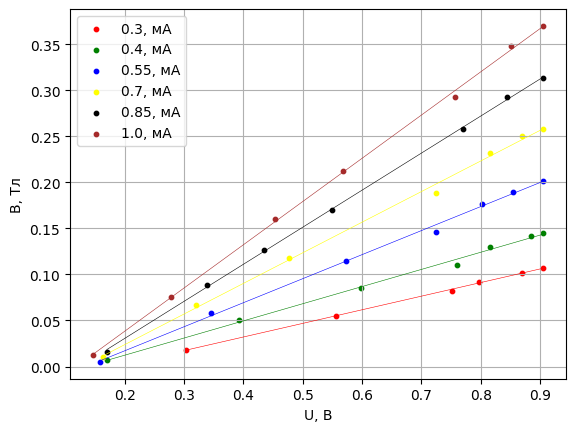

In [89]:
  # график
toki = [0.30, 0.40, 0.55, 0.70, 0.85, 1.00] #mA
shtuki = [d1,d2,d3,d4,d5,d6]
colors = ['red', 'green', 'blue', 'yellow', 'black', 'brown']
k = [1,2,3,4,5,6]
for OPA in range(6):
    ox = [true(i) for i in shtuki[OPA]['i']]
    oy =                   shtuki[OPA]['u']

    plt.scatter(
      ox,
      oy,
      s=10,
      label=str(toki[OPA]) + ", мА",
      color=colors[OPA]
    )
    z1, res= np.polyfit(ox, oy, 1, full=False, cov=True)
    pp1 = np.poly1d(z1)
    plt.plot(ox, pp1(ox), linewidth=0.4, color=colors[OPA], linestyle='-')
    k[OPA] = pp1[1]
    print(str(pp1), "eror:", res[0][0] ** 0.5/((z1[0])**2))



plt.xlabel("U, В")
plt.ylabel("B, Тл")
plt.grid()
plt.legend(loc='best')
# plt.savefig("p1.png")
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

[0.1478300237998647, 0.18634106932233205, 0.26108506451083496, 0.33248987696310695, 0.4025051634805818, 0.4695363566348655]
[0.3, 0.4, 0.55, 0.7, 0.85, 1.0]
0.4661174748838566


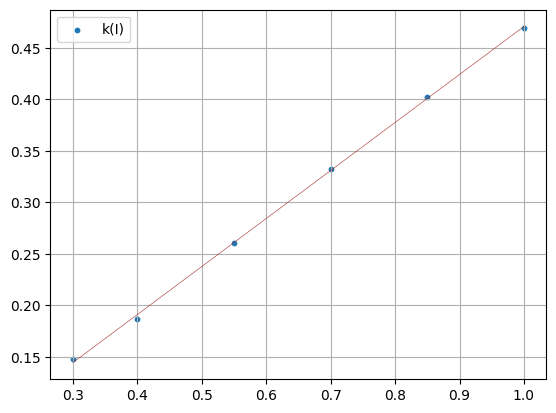

In [94]:
ox = toki
oy = k
print(k)
print(toki)
plt.scatter(
  ox,
  oy,
  s=10,
  label="k(I)"
)
z1, res= np.polyfit(ox, oy, 1, full=False, cov=True)
ppp1 = np.poly1d(z1)
plt.plot(ox, ppp1(ox), linewidth=0.4, color=colors[OPA], linestyle='-')
k[OPA] = pp1[1]
plt.legend(loc='best')
plt.grid()
# print(str(pp1[1]), "eror:", res[0][0] ** 0.5/((z1[0])**2))
print(ppp1[1])

In [106]:
rh = ppp1[1]*2.2
n = 1 /(1.6*10**-19*rh)
sigma=3/(1.72 * 1.5 * 1.7) * 1000
rho = 1 / sigma
print(f"{n=}\n{rh=}\n{sigma=}\n{rho=}")

n=6.09483498042412e+18
rh=1.0254584447444846
sigma=683.9945280437756
rho=0.001462


# V

In [15]:
i=1 #mA
u_35=1.718# mV